<a href="https://colab.research.google.com/github/tansexe/AD-Lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = "house_data.csv"

In [ ]:
df = pd.read_csv(file_path)
print(df.head(5))

   House_Size    House_Price
0  374.540119  116714.389066
1  950.714306  270263.924400
2  731.993942  224186.221370
3  598.658484   80219.099529
4  156.018640   35821.997741


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   House_Size   100 non-null    float64
 1   House_Price  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.isnull().sum()

,0
House_Size,0
House_Price,0
Z_Score,0


In [ ]:
stats = df.describe()
print(stats)

       House_Size    House_Price
count  100.000000     100.000000
mean   470.180743  141000.205005
std    297.489411   93956.895853
min      5.522117  -38096.894236
25%    193.200761   65139.721461
50%    464.142455  133802.788924
75%    730.203119  214881.918906
max    986.886937  352219.753320


In [ ]:
print(df.columns)

Index(['House_Size', 'House_Price'], dtype='object')


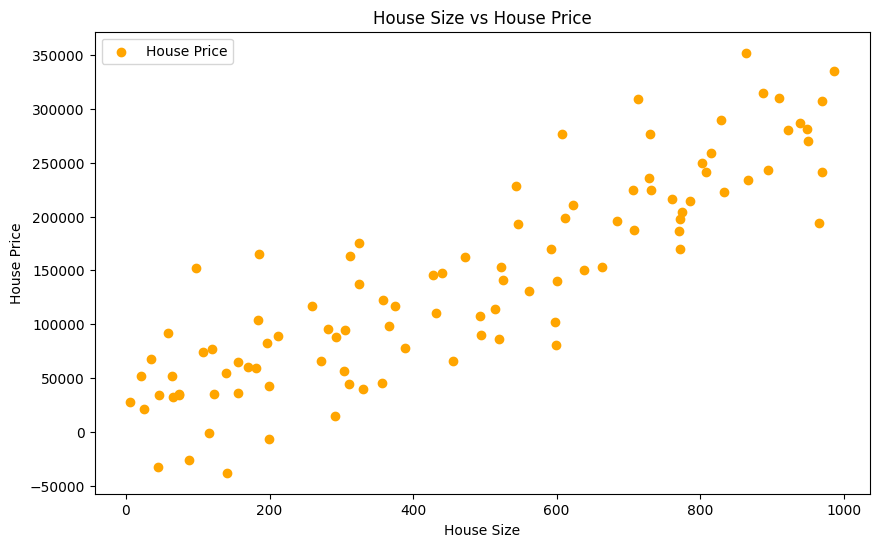

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['House_Size'], df['House_Price'], color='orange', label='House Price')
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("House Size vs House Price")
plt.legend()
plt.show()

In [ ]:
# Outliers removal
Q1 = df['House_Price'].quantile(0.25)
Q3 = df['House_Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
print(IQR)

149742.1974454327


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['House_Price'] < lower_bound) | (df['House_Price'] > upper_bound)]
print("Outliers in House_Price:\n", outliers)

Outliers in House_Price:
 Empty DataFrame
Columns: [House_Size, House_Price]
Index: []


In [ ]:
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Q1: 65139.72146052577
Q3: 214881.91890595848
IQR: 149742.1974454327
Lower Bound: -159473.5747076233
Upper Bound: 439495.2150741075


In [ ]:
print("Min House_Price:", df['House_Price'].min())
print("Max House_Price:", df['House_Price'].max())

Min House_Price: -38096.89423563258
Max House_Price: 352219.75331991585


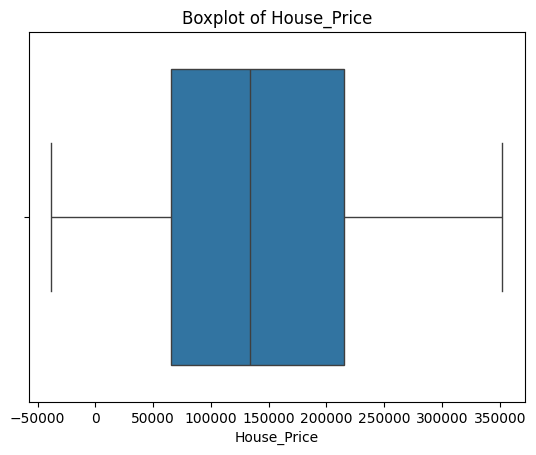

In [ ]:
sns.boxplot(x=df['House_Price'])
plt.title("Boxplot of House_Price")
plt.show()

In [ ]:
from scipy.stats import zscore

df['Z_Score'] = (df['House_Price'] - df['House_Price'].mean()) / df['House_Price'].std()
outliers_z = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]
print("Outliers using Z-score:\n", outliers_z)

Outliers using Z-score:
 Empty DataFrame
Columns: [House_Size, House_Price, Z_Score]
Index: []


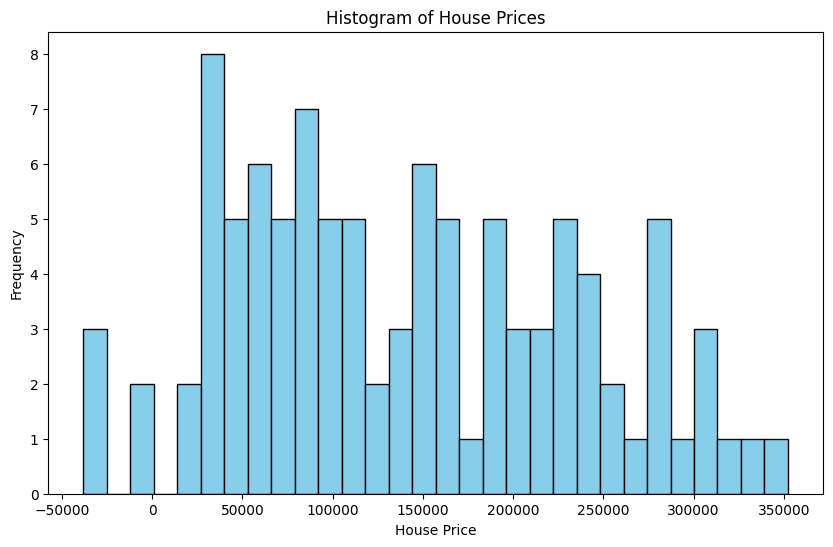

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['House_Price'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of House Prices")
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.show()

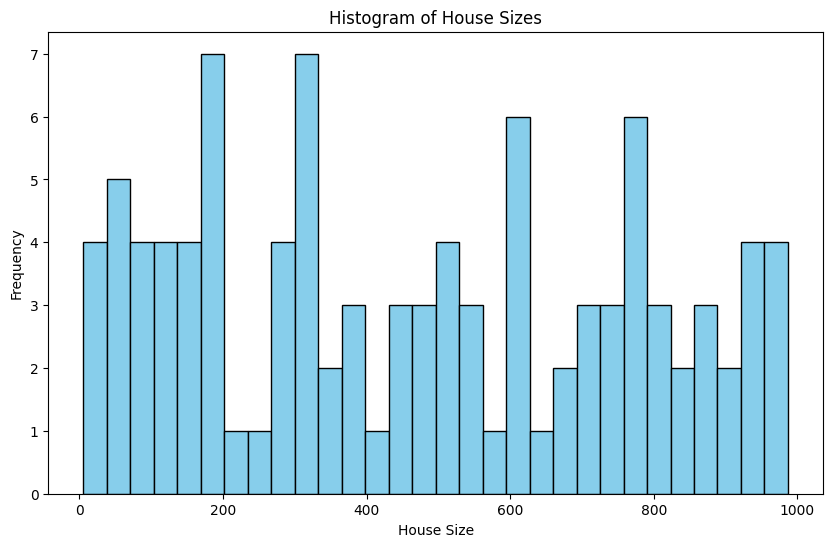

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['House_Size'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of House Sizes")
plt.xlabel("House Size")
plt.ylabel("Frequency")
plt.show()

In [ ]:
negative_prices = df[df['House_Price'] < 0]
print("Negative House Prices:\n", negative_prices)

Negative House Prices:
     House_Size   House_Price   Z_Score
56   88.492502 -26567.435071 -1.783452
58   45.227289 -32403.025039 -1.845562
66  140.924225 -38096.894236 -1.906162
71  198.715682  -6408.126194 -1.568893
79  115.869060   -956.853044 -1.510874


In [ ]:
df_clean = df[df['House_Price'] >= 0].copy()
print("Cleaned Dataset Size:", df_clean.shape)

Cleaned Dataset Size: (95, 3)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean['House_Size_Scaled'] = scaler.fit_transform(df_clean[['House_Size']])
print(df_clean[['House_Size', 'House_Size_Scaled']].sample(5))

    House_Size  House_Size_Scaled
80  863.103426           0.873866
46  311.711076           0.312003
13  212.339111           0.210744
5   155.994520           0.153330
26  199.673782           0.197838


In [ ]:
from sklearn.model_selection import train_test_split
X = df_clean[['House_Size_Scaled']]
y = df_clean['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 76 samples
Testing set size: 19 samples


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

# Print model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Slope): {model.coef_[0]:.2f}")

Model Evaluation:
Mean Squared Error (MSE): 939594127.57
R-squared Score (R²): 0.85

Model Coefficients:
Intercept: 24131.37
Coefficient (Slope): 257539.97


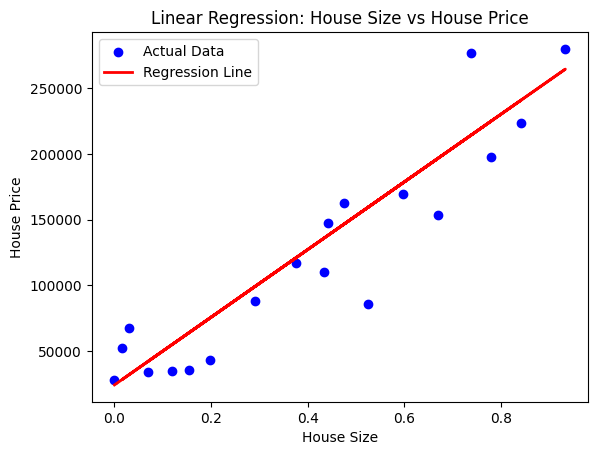

In [ ]:
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.title("Linear Regression: House Size vs House Price")
plt.legend()
plt.show()